In [46]:
import os
import sys
import pickle
import argparse
import numpy as np
import matplotlib.pyplot as plt

# Colors for each algorithm
COLORS = {
    'SMAC': 'red',
    'RandomSearch': 'blue',
    'GridSearch': 'green'
}

def create_optimization_plot(results, metric, metric_name, seeds):
    """Create a plot showing optimization progress for a given metric across all seeds"""
    plt.figure(figsize=(12, 8))

    # For each optimizer
    for opt_name in ['SMAC', 'RandomSearch', 'GridSearch']:
        # Collect all runs and convert to same index basis
        all_runs_values = []

        for seed in seeds:
            df = results[(opt_name, metric, seed)]['history']

            # Convert history to list of values if it's not already
            if isinstance(df['history'].iloc[0], str):
                df['history'] = df['history'].str.split('|').apply(lambda x: [tuple(map(float, i.split(':'))) for i in x])

            # Get the cumulative best value at each evaluation
            values = []
            if metric > 7:  # For accuracy metrics, track maximum
                current_best = float('-inf')
                for row in df.itertuples():
                    for _, val in row.history:
                        val = -val  # Convert back to positive accuracy immediately
                        current_best = max(current_best, val)
                        values.append(current_best)
            else:  # For cross entropy metrics, track minimum
                current_best = float('inf')
                for row in df.itertuples():
                    for _, val in row.history:
                        current_best = min(current_best, val)
                        values.append(current_best)

            all_runs_values.append(values)

        # Convert to numpy array and pad shorter runs to match longest
        max_len = max(len(run) for run in all_runs_values)
        padded_runs = []
        for run in all_runs_values:
            if len(run) < max_len:
                # Pad with the last value
                padded_runs.append(run + [run[-1]] * (max_len - len(run)))
            else:
                padded_runs.append(run)

        # Convert to numpy array for averaging
        all_runs_array = np.array(padded_runs)

        # Calculate mean and std across seeds
        mean_values = np.mean(all_runs_array, axis=0)
        std_values = np.std(all_runs_array, axis=0)

        # Create x-axis values (evaluation indices)
        x = np.arange(len(mean_values))

        # Plot mean line
        plt.plot(x, mean_values,
                color=COLORS[opt_name],
                label=opt_name,
                linewidth=2)

        # Add shaded region for standard deviation
        plt.fill_between(x,
                        mean_values - std_values,
                        mean_values + std_values,
                        color=COLORS[opt_name],
                        alpha=0.2)

    plt.title(f'Algorithm Comparison - {metric_name}\nSolid lines show mean best value across {len(seeds)} seeds')
    plt.xlabel('Number of Evaluations')

    if metric <= 7:  # Cross entropy metrics
        plt.ylabel('Cross Entropy (lower is better)')
        plt.yscale('log')
    else:  # Accuracy metrics
        plt.ylabel('Accuracy (higher is better)')
        plt.yscale('linear')

    plt.grid(True, which="both", ls="-", alpha=0.2)
    plt.legend()

    plt.show()

def main():
    # Convert to absolute paths
    # results_dir = os.path.abspath(args.results_dir)
    results_dir = "./20250129_023617"

    # Load the results
    results_file = os.path.join(results_dir, "data", "optimization_results.pickle")
    if not os.path.exists(results_file):
        print(f"Error: Could not find results file at {results_file}")
        print(f"Current working directory: {os.getcwd()}")
        print(f"Please make sure the path to results directory is correct")
        sys.exit(1)

    with open(results_file, 'rb') as f:
        data = pickle.load(f)

    all_results = data['all_results']
    config = data['config']

    # Set output directory
    # if args.output_dir:
    #     output_dir = os.path.abspath(args.output_dir)
    # else:
    #     output_dir = os.path.join(results_dir, "plots")
    # os.makedirs(output_dir, exist_ok=True)

    # print(f"Loading results from: {results_file}")
    # print(f"Saving plots to: {output_dir}")

    # Create plots for each metric
    # for metric in config['metrics']:
    #     metric_name = config['metric_names'][metric]
    #     print(f"Creating plot for {metric_name}...")

    #     fig = create_optimization_plot(all_results, metric, metric_name, config['seeds'])

    #     # Save plot
    #     output_file = os.path.join(output_dir, f"optimization_plot_{metric_name.replace(' ', '_')}.png")
    #     fig.savefig(output_file, dpi=300, bbox_inches='tight')
    #     plt.close(fig)
    #     print(f"Saved plot to {output_file}")

    print("\nAll plots have been created successfully!")

main()



All plots have been created successfully!


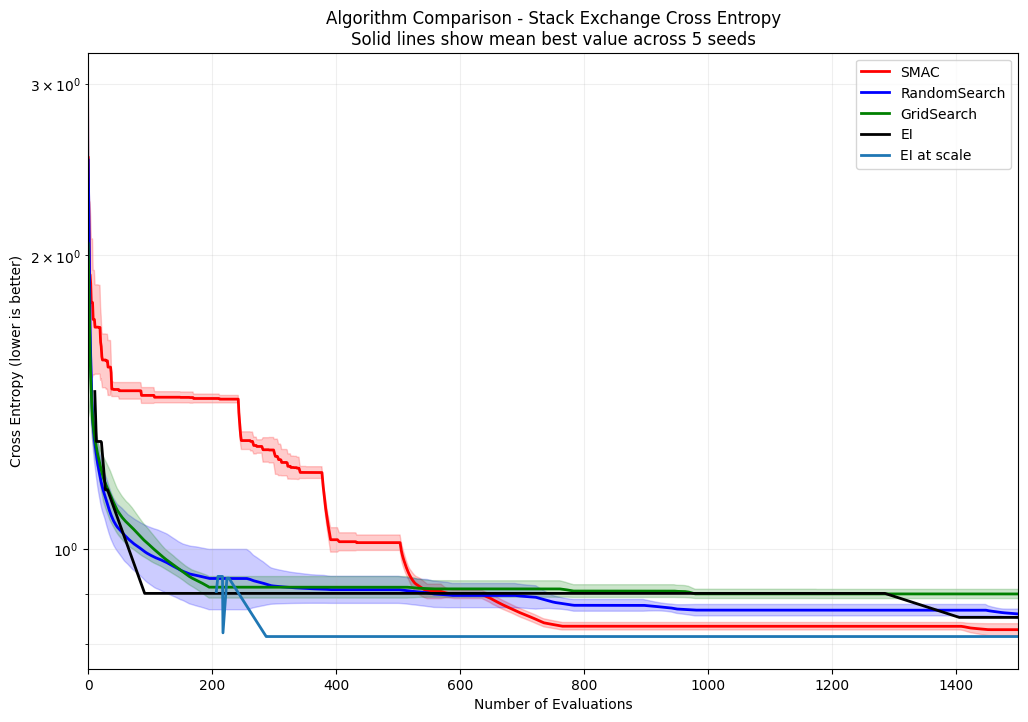

In [76]:
results_dir = "./20250129_023617"
results_file = os.path.join(results_dir, "data", "optimization_results.pickle")
with open(results_file, 'rb') as f:
    data = pickle.load(f)

plt.figure(figsize=(12, 8))

results = data['all_results']
config = data['config']
metric = config['metrics'][3]
metric_name = config['metric_names'][metric]

# For each optimizer
for opt_name in ['SMAC', 'RandomSearch', 'GridSearch']:
    # Collect all runs and convert to same index basis
    all_runs_values = []

    for seed in config['seeds']:
        df = results[(opt_name, metric, seed)]['history']

        # Convert history to list of values if it's not already
        if isinstance(df['history'].iloc[0], str):
            df['history'] = df['history'].str.split('|').apply(lambda x: [tuple(map(float, i.split(':'))) for i in x])

        # Get the cumulative best value at each evaluation
        values = []
        if metric > 7:  # For accuracy metrics, track maximum
            current_best = float('-inf')
            for row in df.itertuples():
                for _, val in row.history:
                    val = -val  # Convert back to positive accuracy immediately
                    current_best = max(current_best, val)
                    values.append(current_best)
        else:  # For cross entropy metrics, track minimum
            current_best = float('inf')
            for row in df.itertuples():
                for _, val in row.history:
                    current_best = min(current_best, val)
                    values.append(current_best)

        all_runs_values.append(values)

    # Convert to numpy array and pad shorter runs to match longest
    max_len = max(len(run) for run in all_runs_values)
    padded_runs = []
    for run in all_runs_values:
        if len(run) < max_len:
            # Pad with the last value
            padded_runs.append(run + [run[-1]] * (max_len - len(run)))
        else:
            padded_runs.append(run)

    # Convert to numpy array for averaging
    all_runs_array = np.array(padded_runs)

    # Calculate mean and std across seeds
    mean_values = np.mean(all_runs_array, axis=0)
    std_values = np.std(all_runs_array, axis=0)

    # Create x-axis values (evaluation indices)
    x = np.arange(len(mean_values))

    # Plot mean line
    plt.plot(x, mean_values,
            color=COLORS[opt_name],
            label=opt_name,
            linewidth=2)

    # Add shaded region for standard deviation
    plt.fill_between(x,
                    mean_values - std_values,
                    mean_values + std_values,
                    color=COLORS[opt_name],
                    alpha=0.2)

plt.title(f'Algorithm Comparison - {metric_name}\nSolid lines show mean best value across {len(config["seeds"])} seeds')
plt.xlabel('Number of Evaluations')

if metric <= 7:  # Cross entropy metrics
    plt.ylabel('Cross Entropy (lower is better)')
    plt.yscale('log')
else:  # Accuracy metrics
    plt.ylabel('Accuracy (higher is better)')
    plt.yscale('linear')

plt.grid(True, which="both", ls="-", alpha=0.2)

# Load ei results
ei_folder = "./results/ei_optimizer/StackExchangeCE/rbf_product/42"
cum_cost = np.load(f'{ei_folder}/cumcost.npy')
best_y = np.load(f'{ei_folder}/best_ys.npy')
best_yass = np.load(f'{ei_folder}/best_yass.npy')
plt.plot(cum_cost, best_y, color='black', label="EI", linewidth=2)
plt.plot(cum_cost + 196, best_yass, label="EI at scale", linewidth=2)

plt.legend()

plt.xlim([0, 1500])
plt.show()



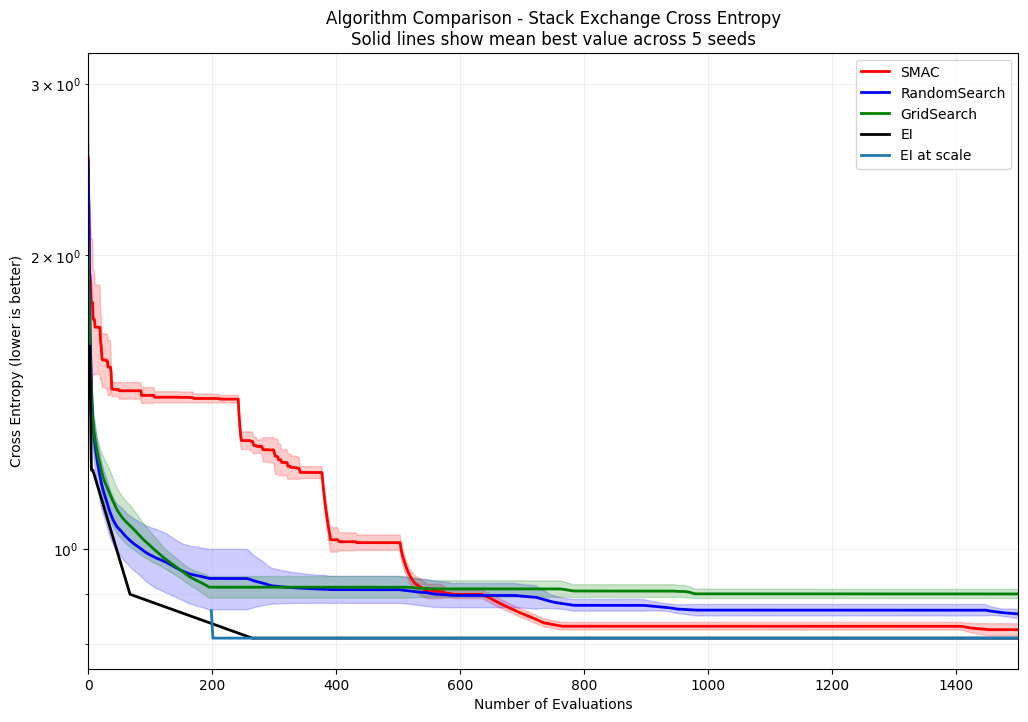

In [78]:
results_dir = "./20250129_023617"
results_file = os.path.join(results_dir, "data", "optimization_results.pickle")
with open(results_file, 'rb') as f:
    data = pickle.load(f)

plt.figure(figsize=(12, 8))

results = data['all_results']
config = data['config']
metric = config['metrics'][3]
metric_name = config['metric_names'][metric]

# For each optimizer
for opt_name in ['SMAC', 'RandomSearch', 'GridSearch']:
    # Collect all runs and convert to same index basis
    all_runs_values = []

    for seed in config['seeds']:
        df = results[(opt_name, metric, seed)]['history']

        # Convert history to list of values if it's not already
        if isinstance(df['history'].iloc[0], str):
            df['history'] = df['history'].str.split('|').apply(lambda x: [tuple(map(float, i.split(':'))) for i in x])

        # Get the cumulative best value at each evaluation
        values = []
        if metric > 7:  # For accuracy metrics, track maximum
            current_best = float('-inf')
            for row in df.itertuples():
                for _, val in row.history:
                    val = -val  # Convert back to positive accuracy immediately
                    current_best = max(current_best, val)
                    values.append(current_best)
        else:  # For cross entropy metrics, track minimum
            current_best = float('inf')
            for row in df.itertuples():
                for _, val in row.history:
                    current_best = min(current_best, val)
                    values.append(current_best)

        all_runs_values.append(values)

    # Convert to numpy array and pad shorter runs to match longest
    max_len = max(len(run) for run in all_runs_values)
    padded_runs = []
    for run in all_runs_values:
        if len(run) < max_len:
            # Pad with the last value
            padded_runs.append(run + [run[-1]] * (max_len - len(run)))
        else:
            padded_runs.append(run)

    # Convert to numpy array for averaging
    all_runs_array = np.array(padded_runs)

    # Calculate mean and std across seeds
    mean_values = np.mean(all_runs_array, axis=0)
    std_values = np.std(all_runs_array, axis=0)

    # Create x-axis values (evaluation indices)
    x = np.arange(len(mean_values))

    # Plot mean line
    plt.plot(x, mean_values,
            color=COLORS[opt_name],
            label=opt_name,
            linewidth=2)

    # Add shaded region for standard deviation
    plt.fill_between(x,
                    mean_values - std_values,
                    mean_values + std_values,
                    color=COLORS[opt_name],
                    alpha=0.2)

plt.title(f'Algorithm Comparison - {metric_name}\nSolid lines show mean best value across {len(config["seeds"])} seeds')
plt.xlabel('Number of Evaluations')

if metric <= 7:  # Cross entropy metrics
    plt.ylabel('Cross Entropy (lower is better)')
    plt.yscale('log')
else:  # Accuracy metrics
    plt.ylabel('Accuracy (higher is better)')
    plt.yscale('linear')

plt.grid(True, which="both", ls="-", alpha=0.2)

# Load ei results
ei_folder = "./results/ei_optimizer/StackExchangeCE/rbf_product/84"
cum_cost = np.load(f'{ei_folder}/cumcost.npy')
best_y = np.load(f'{ei_folder}/best_ys.npy')
best_yass = np.load(f'{ei_folder}/best_yass.npy')
plt.plot(cum_cost, best_y, color='black', label="EI", linewidth=2)
plt.plot(cum_cost + 196, best_yass, label="EI at scale", linewidth=2)

plt.legend()

plt.xlim([0, 1500])
plt.show()

